In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
houses = fetch_california_housing()

In [4]:
df = pd.DataFrame(data = np.c_[houses['data'], houses['target']],
                     columns= houses['feature_names'] + ['target'])

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
print(houses.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
y = df['target']
X = df.drop('target', axis = 1)

In [9]:
def metrics(X, y):
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    rmse_train = mean_squared_error(y_train, train_pred)
    rmse_test = mean_squared_error(y_test, test_pred)
    r2_train = r2_score(y_train, train_pred)
    r2_test = r2_score(y_test, test_pred)
    print(f'RMSE train: {rmse_train**0.5}; \nRMSE test: {rmse_test**0.5};\nR2 train: {r2_train};\nR2 test: {r2_test}')

In [10]:
metrics(X, y)

RMSE train: 0.7196757085831575; 
RMSE test: 0.7455813830127763;
R2 train: 0.6125511913966952;
R2 test: 0.575787706032451


<AxesSubplot:>

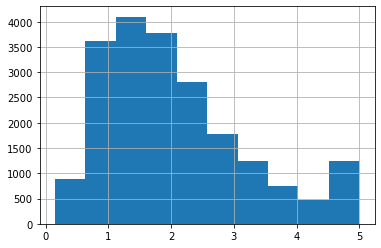

In [11]:
y.hist()

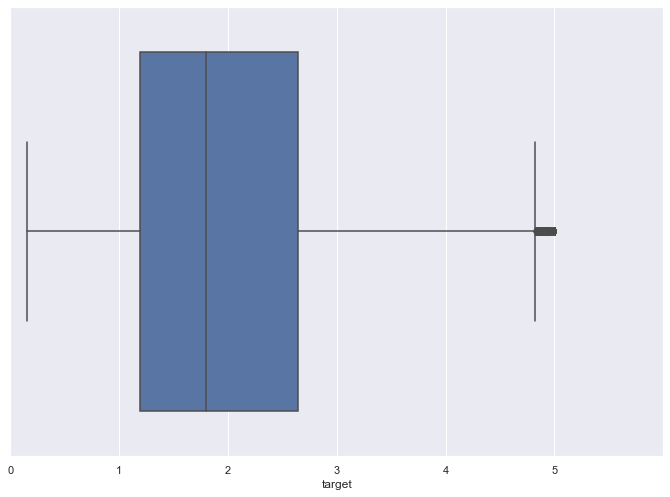

In [32]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = df['target'])
ax.set_xlim(0,6)
ax.set_xticks(range(0,6))
plt.show()

Дома, стоящие больше 4.8 - выбросы. Не думаю, что их стоит удалять, так как они ненастолько сильно отличаются от других признаков.

<AxesSubplot:>

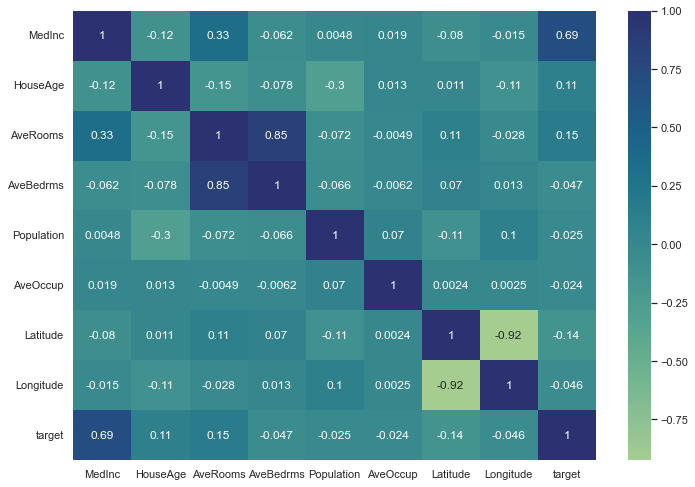

In [13]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap="crest")

Между собой сильно коррелируют признаки AveRooms и AveBedrms. Удалим AveBedrms.

In [14]:
X1 = X.drop('AveBedrms', axis = 1)
у1 = df['target']

In [15]:
metrics(X1, y)

RMSE train: 0.7316746485880744; 
RMSE test: 0.7398151789804082;
R2 train: 0.599523850205593;
R2 test: 0.5823239094526447


Метрики не сильно улучшились, а какие-то ухудшились, после удаления скореллированного признака.

<AxesSubplot:xlabel='MedInc'>

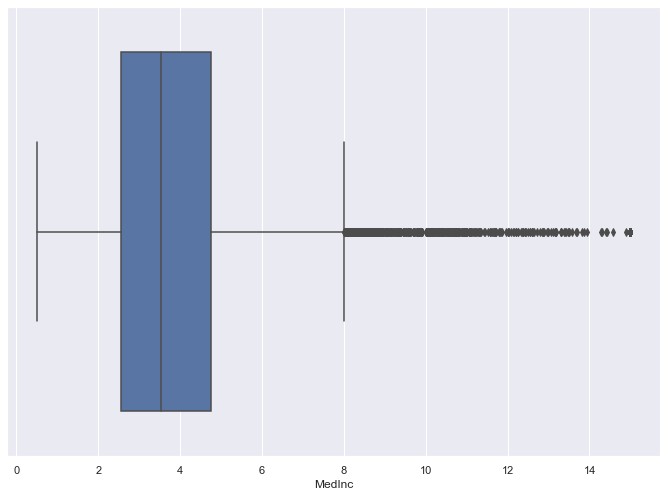

In [16]:
sns.boxplot(x = df['MedInc'])

Опять же, разброс значений не слишком большой, и данные распределены примерно равномерно, что может оказывать влияние на таргет, поэтому избавляться от выбросов в MedInc не будем.

<AxesSubplot:xlabel='HouseAge'>

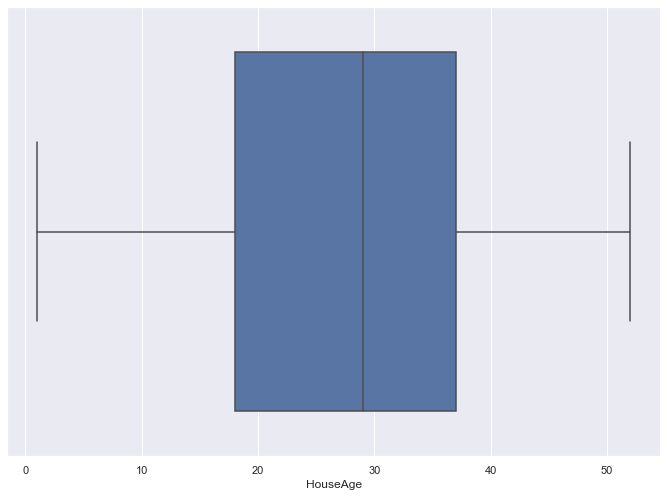

In [17]:
sns.boxplot(x = df['HouseAge'])

Тут выбросов не наблюдается.

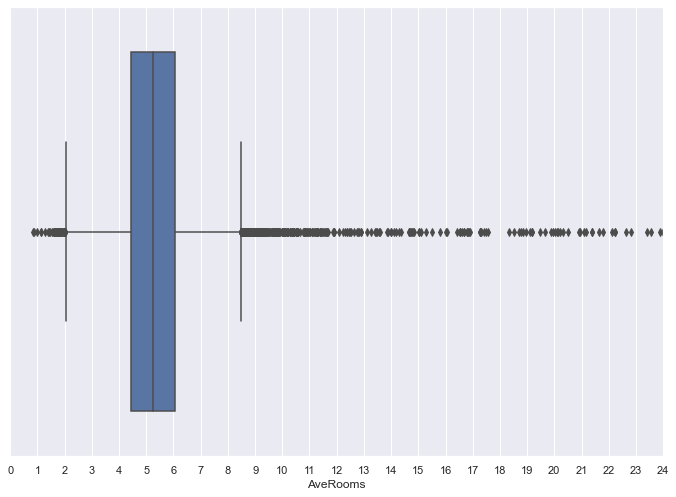

In [18]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = df['AveRooms'])
ax.set_xlim(0,20)
ax.set_xticks(range(0,25,1))
plt.show()

<AxesSubplot:xlabel='AveRooms', ylabel='target'>

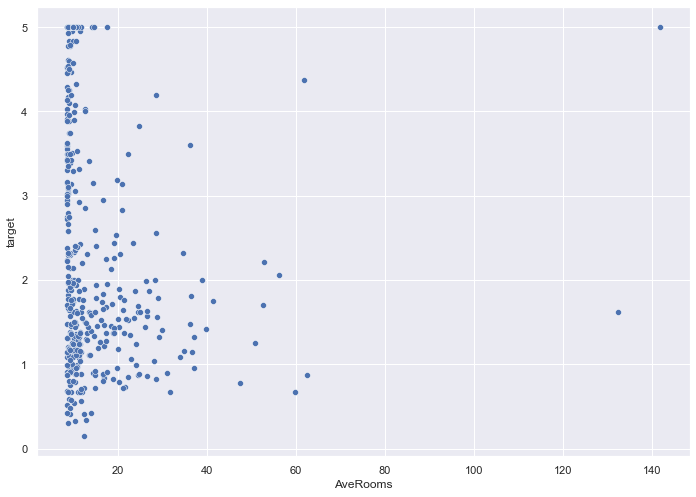

In [19]:
df_avr = df[df['AveRooms']>8.4][['AveRooms', 'target']]
sns.scatterplot(data=df_avr, x = 'AveRooms', y='target')

Видим, что большое количество комнат никак не влияет на целевую переменную. Очевидно, что это выбросы, которые могут негативно сказаться на точности модели. Позже их удалим.

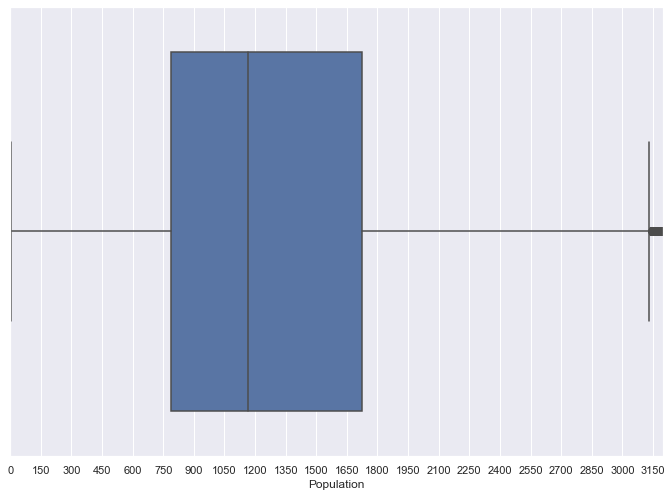

In [20]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = df['Population'])
ax.set_xlim(0,3200)
ax.set_xticks(range(0,3200,150))
plt.show()

<AxesSubplot:xlabel='Population', ylabel='target'>

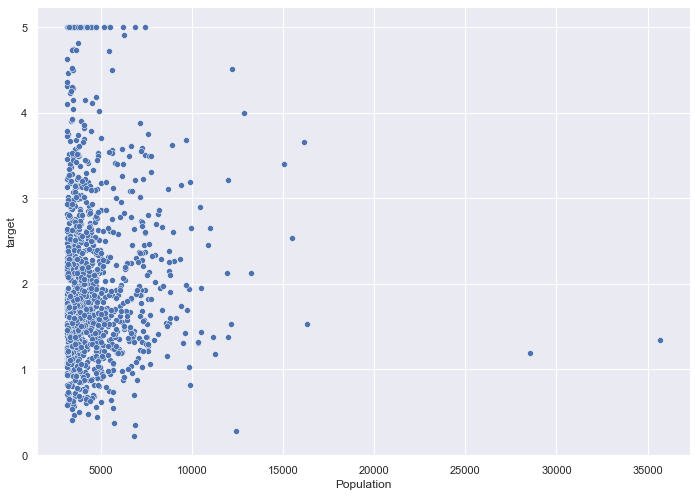

In [21]:
df_pop = df[df['Population']>3120][['Population', 'target']]
sns.scatterplot(data=df_pop, x = 'Population', y='target')

Делаем вывод, аналогичный тому, что выше. Тоже позже удалим.

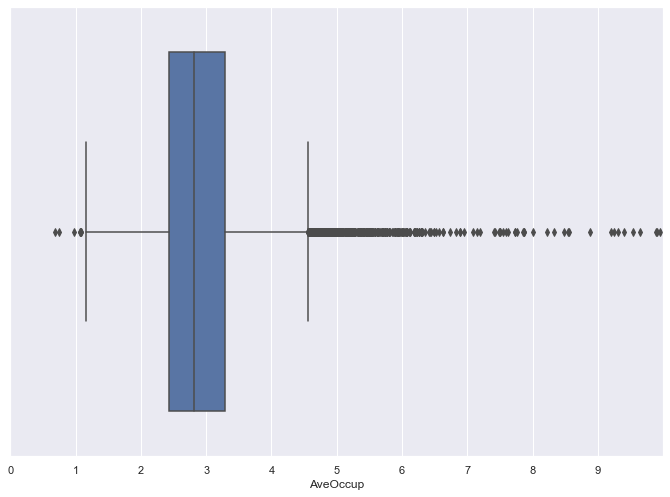

In [22]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = df['AveOccup'])
ax.set_xlim(0,10)
ax.set_xticks(range(0,10,1))
plt.show()

<AxesSubplot:xlabel='AveOccup', ylabel='target'>

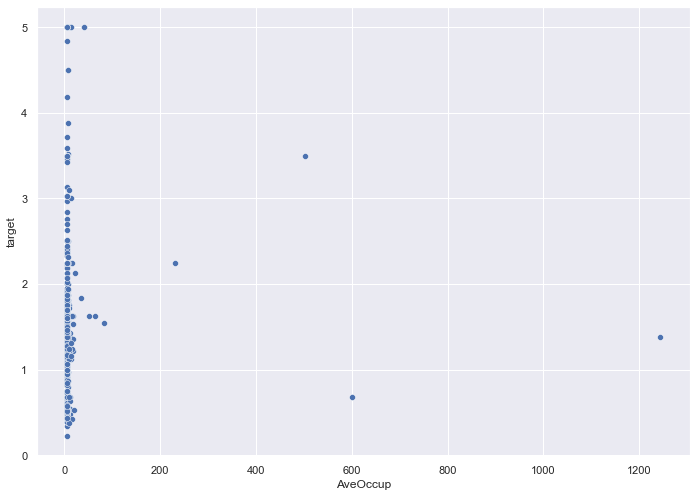

In [23]:
df_avo = df[df['AveOccup']>4.6][['AveOccup', 'target']]
sns.scatterplot(data=df_avo, x = 'AveOccup', y='target')

Тоже можно удалять. Удалим.

In [24]:
df_copy = df.copy()
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
df_copy = df_copy.drop('AveBedrms', axis = 1)

In [26]:
df_copy = df_copy.loc[(df_copy['AveRooms']<8.4)&(df_copy['AveOccup']<4.6)&
                      + (df_copy['Population']<3120)]

In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18389 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      18389 non-null  float64
 1   HouseAge    18389 non-null  float64
 2   AveRooms    18389 non-null  float64
 3   Population  18389 non-null  float64
 4   AveOccup    18389 non-null  float64
 5   Latitude    18389 non-null  float64
 6   Longitude   18389 non-null  float64
 7   target      18389 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [28]:
X2 = df_copy.drop('target', axis = 1)
y2 = df_copy['target']

In [29]:
metrics(X2, y2)

RMSE train: 0.665797757114215; 
RMSE test: 0.6815961945588582;
R2 train: 0.6662814077012353;
R2 test: 0.6462109507851745


Видим, что метрики улучшились.

Попробуем преобразовать некоторые признаки, но очень сомневаюсь, что после этого результаты улучшатся.

In [30]:
df_copy2 = df_copy.copy()

In [31]:
df_copy2['HouseAge'] = np.sqrt(df_copy2['HouseAge'])
df_copy2['Population'] = np.log(df_copy2['Population'])
df_copy2['Latitude'] = np.log(df_copy2['Latitude'])
df_copy2['Longitude'] = np.log(abs(df_copy2['Longitude']))

In [33]:
X3 = df_copy2.drop('target', axis = 1)
y3 = df_copy2['target']

In [34]:
metrics(X3, y3)

RMSE train: 0.6670578742200788; 
RMSE test: 0.6832917553170003;
R2 train: 0.6650169923334408;
R2 test: 0.6444485672438647


Метрики не сильно изменились, но немного ухудшились по сравнению с предыдущей попыткой. Возможно, стоило преобразовать признаки по-другому.